#Mulyiple Regression Analysis

In [1]:
"""The effect of temperature and reaction time affects the % yield. The data
collected in given in the Mult-Reg_Yield file. Develop a model for % yield
in terms of temperature and time?"""

'The effect of temperature and reaction time affects the % yield. The data\ncollected in given in the Mult-Reg_Yield file. Develop a model for % yield\nin terms of temperature and time?'

### Import Packages

In [2]:
from google.colab import files
import io
import pandas as pd 
from scipy import stats 
import matplotlib.pyplot as plt
import math 
from pandas.plotting import scatter_matrix 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

### Read Data

In [3]:
uploaded = files.upload()
data=pd.read_csv(io.BytesIO(uploaded['Mult_Reg_Yield.csv']))
data

Saving Mult_Reg_Yield.csv to Mult_Reg_Yield.csv


,Time,Temperature,Yield
0,130,190,35.0
1,174,176,81.7
2,134,205,42.5
3,191,210,98.3
4,165,230,52.7
5,194,192,82.0
6,143,220,34.5
7,186,235,95.4
8,139,240,56.7
9,188,230,84.4


In [4]:
data.head()
time=data.Time
temp = data.Temperature
output = data['Yield']
print(time, temp, output)

0     130
1     174
2     134
3     191
4     165
5     194
6     143
7     186
8     139
9     188
10    175
11    156
12    190
13    178
14    132
15    148
Name: Time, dtype: int64 0     190
1     176
2     205
3     210
4     230
5     192
6     220
7     235
8     240
9     230
10    200
11    218
12    220
13    210
14    208
15    225
Name: Temperature, dtype: int64 0     35.0
1     81.7
2     42.5
3     98.3
4     52.7
5     82.0
6     34.5
7     95.4
8     56.7
9     84.4
10    94.3
11    44.3
12    83.3
13    91.4
14    43.5
15    51.7
Name: Yield, dtype: float64


### correlation Analysis

In [5]:
"""Correlation between Y and x’s should high
   Correlation between X’s should be low
"""


'Correlation between Y and x’s should high\n   Correlation between X’s should be low\n'

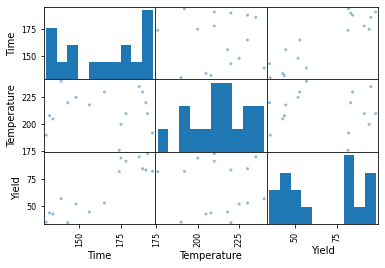

In [7]:
scatter_matrix(data)
plt.show()

### regression Output

In [8]:
mymodel = ols("output~time+temp",data).fit()
mymodel.summary()

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 output   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     27.07
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           2.32e-05
Time:                        07:36:37   Log-Likelihood:                -59.703
No. Observations:                  16   AIC:                             125.4
Df Residuals:                      13   BIC:                             127.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -67.8844     40.587     -1.673      0.118    -155.566      19.797
time           0.9061      0.123      7.344      0.000       0.640       1.173
temp          -0.0642      0.164     -0.392      0.702      -0.418       0.290
==============================================================================
Omnibus:                        1.984   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                0.970
Skew:                          -0.078   Prob(JB):                        0.616
Kurtosis:                       1.804   Cond. No.                     3.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
anova_table = anova_lm(mymodel)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
time,1.0,6777.810462,6777.810462,53.987220,0.000006
temp,1.0,19.252534,19.252534,0.153352,0.701696
Residual,13.0,1632.081378,125.544721,NaN,NaN


we found that the time has a relation with yield because P < 0.05


### Regrassion model - Identify the model

In [11]:
mymodel = ols("output~time",data).fit()
mymodel.summary()


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 output   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     57.46
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           2.55e-06
Time:                        07:38:31   Log-Likelihood:                -59.797
No. Observations:                  16   AIC:                             123.6
Df Residuals:                      14   BIC:                             125.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -81.6205     19.791     -4.124      0.001    -124.067     -39.174
time           0.9065      0.120      7.580      0.000       0.650       1.163
==============================================================================
Omnibus:                        1.894   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                0.969
Skew:                          -0.127   Prob(JB):                        0.616
Kurtosis:                       1.822   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Residual analysis

In [12]:
pred = mymodel.predict()
res = output - pred
res

0     -1.218472
1      5.597558
2      2.655712
3      6.787842
4    -15.244357
5    -12.231519
6    -13.502372
7      8.420112
8     12.323443
9     -4.392796
10    17.291104
11   -15.486272
12    -7.305704
13    11.671743
14     5.468620
15    -0.834642
Name: Yield, dtype: float64

### Residual Analysis – Actual Vs Fitted

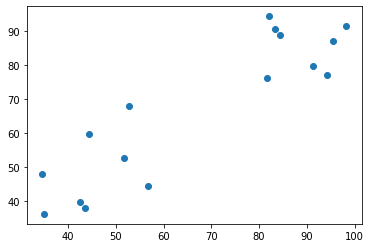

In [15]:
plt.scatter(output,pred)
plt.show()

There need to be strong positive correlation between actual and fitted response

### Residual Analysis : Normality test  -- Shapiro - Wilk test

In [16]:
stats.mstats.normaltest(res)

/usr/local/lib/python3.9/dist-packages/scipy/stats/_mstats_basic.py:3007: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn(


NormaltestResult(statistic=1.8944805759902916, pvalue=0.3878097913672056)

### Residual Analysis : Normality test --Q-Q

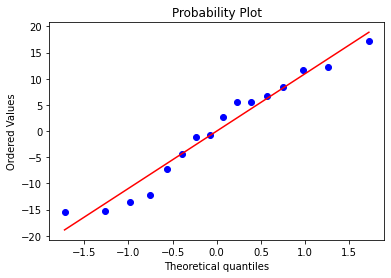

In [19]:
stats.probplot(res,plot=plt)
plt.show()

In [20]:
res_sq = res**2  # sq of residuals
res_sq

0       1.484674
1      31.332656
2       7.052809
3      46.074804
4     232.390427
5     149.610062
6     182.314057
7      70.898281
8     151.867252
9      19.296657
10    298.982283
11    239.824635
12     53.373308
13    136.229575
14     29.905807
15      0.696627
Name: Yield, dtype: float64

In [21]:
mse = res_sq.mean()  # mean sq error
print(mse)

103.20836953433397


In [22]:
import math 
rmse = math.sqrt(mse) # root of mean sq error
print(rmse)

10.159152008624242


##Model Adequacy check 
### Residuals Vs Indepndent variables

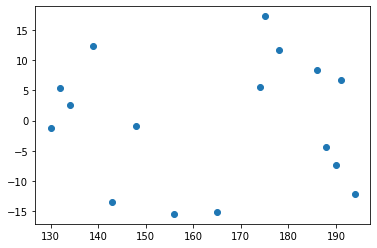

In [24]:
plt.scatter(time,res)
plt.show()    #  There should be any pattren or trend, the points should be distributed randomly.